In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.colors as mcolors
sns.set_style('darkgrid')

In [436]:
def create_sample(mean1,cov1, n_samples=500):
    # Generate samples from each distribution
    samples = np.random.multivariate_normal(mean1, cov1, n_samples)
    return samples 

def create_dataframe(means,convs, n_sample=500):
    data = []
    for index, (mean, conv) in enumerate(zip(means,convs)):
        data.append(create_sample(mean, conv))
    data = np.concatenate(data,axis=0)
    return pd.DataFrame(data={'x':data[:,0],'y':data[:,1],'label':np.array([[f'polar {i}']*n_sample for i in range(1,len(means)+1)]).flatten()})

def get_vote(df,candidates):
    scores = []
    for candidate in candidates:
        vec = df[['x','y']].values-candidate
        scores.append(np.linalg.norm(vec,axis=1))
    votes = np.argmin(np.stack(scores,axis=1),axis=1)+1
    return votes.astype('str')


In [3]:
means1 = [[3.5, 3.5],[-3.5, -3.5]]
convs1 = [np.array([[1, 0.5], [0.5, 1]])*3,np.array([[1, -0.5], [-0.5, 1]])*3]
n_sample1=500

means2 = [[2.5, 2.5],[-1.5, -1.5]]
convs2 = [np.array([[1, -0.5], [-0.5, 1]])*3,np.array([[1, 0.5], [0.5, 1]])*3]
n_sample2=500

In [4]:
df_A = create_dataframe(means1,convs1)
df_B = create_dataframe(means2,convs2)
df_A['count'] = 1
df_B['count'] = 1

In [5]:
candidates = np.array([[4, 3],[-4, -5],[2.5, -2.5]])

In [437]:
xx, yy = np.meshgrid(np.arange(-12, 12, 0.1), np.arange(-12, 12, 0.1))
df_boundary = pd.DataFrame(data={'x' : xx.flatten(),
                                 'y' : yy.flatten()})

# Create a colormap and norm based on the levels and colors
cmap2 = ListedColormap(['blue', 'orange'])
cmap3 = ListedColormap(['blue', 'orange', 'green'])

df_A['exp_A2']= get_vote(df_A,candidates[:-1])
df_A['exp_A3']= get_vote(df_A,candidates)
df_B['exp_B2']= get_vote(df_B,candidates[:-1])
df_B['exp_B3']= get_vote(df_B,candidates)
df_boundary['exp_2']= get_vote(df_boundary,candidates[:-1])
df_boundary['exp_3']= get_vote(df_boundary,candidates)

<Figure size 700x700 with 0 Axes>

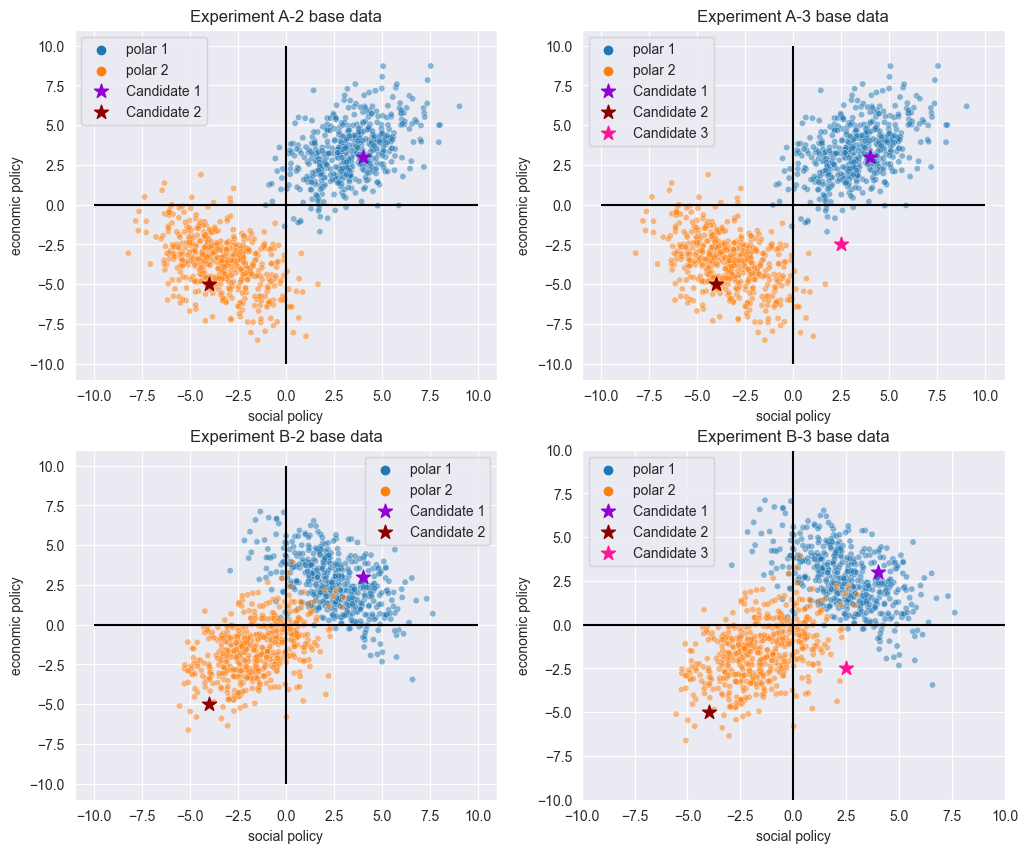

In [416]:
def plot_data(df_A,df_B,x,y, name):
    plt.figure(figsize=(7, 7))
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))

    # first quadrant
    axes[0, 0].hlines(0,10,-10,colors='k')
    axes[0, 0].vlines(0,10,-10,colors='k')
    sns.scatterplot(df_A,x=x,y=y,hue='label', alpha=0.5, s=20, ax = axes[0, 0])
    axes[0, 0].scatter(4, 3, alpha=1, label='Candidate 1', s=110, color='darkviolet', marker='*')
    axes[0, 0].scatter(-4, -5, alpha=1, label='Candidate 2', s=110, color='darkred', marker='*')
    #plt.scatter(2.5, -2.5, alpha=1, label='Candidate 3', s=110, color='deeppink', marker='*')
    axes[0, 0].set_title(f'Experiment A-2 {name}')
    axes[0, 0].set_ylabel('economic policy')
    axes[0, 0].set_xlabel('social policy')
    axes[0, 0].legend()

    # second quadrant
    axes[0, 1].hlines(0,10,-10,colors='k')
    axes[0, 1].vlines(0,10,-10,colors='k')
    sns.scatterplot(df_A,x=x,y=y,hue='label', alpha=0.5, s=20, ax = axes[0, 1])
    axes[0, 1].scatter(4, 3, alpha=1, label='Candidate 1', s=110, color='darkviolet', marker='*')
    axes[0, 1].scatter(-4, -5, alpha=1, label='Candidate 2', s=110, color='darkred', marker='*')
    axes[0, 1].scatter(2.5, -2.5, alpha=1, label='Candidate 3', s=110, color='deeppink', marker='*')
    axes[0, 1].set_title(f'Experiment A-3 {name}')
    axes[0, 1].set_ylabel('economic policy')
    axes[0, 1].set_xlabel('social policy')
    axes[0, 1].legend()

    # third quadrant
    axes[1, 0].hlines(0,10,-10,colors='k')
    axes[1, 0].vlines(0,10,-10,colors='k')
    sns.scatterplot(df_B,x=x,y=y,hue='label', alpha=0.5, s=20, ax = axes[1, 0])
    axes[1, 0].scatter(4, 3, alpha=1, label='Candidate 1', s=110, color='darkviolet', marker='*')
    axes[1, 0].scatter(-4, -5, alpha=1, label='Candidate 2', s=110, color='darkred', marker='*')
    #plt.scatter(2.5, -2.5, alpha=1, label='Candidate 3', s=110, color='deeppink', marker='*')
    axes[1, 0].set_title(f'Experiment B-2 {name}')
    axes[1, 0].set_ylabel('economic policy')
    axes[1, 0].set_xlabel('social policy')
    axes[1, 0].legend()

    # fourth quadrant
    axes[1, 1].hlines(0,10,-10,colors='k')
    axes[1, 1].vlines(0,10,-10,colors='k')
    sns.scatterplot(df_B,x=x,y=y,hue='label', alpha=0.5, s=20, ax = axes[1, 1])
    axes[1, 1].scatter(4, 3, alpha=1, label='Candidate 1', s=110, color='darkviolet', marker='*')
    axes[1, 1].scatter(-4, -5, alpha=1, label='Candidate 2', s=110, color='darkred', marker='*')
    axes[1, 1].scatter(2.5, -2.5, alpha=1, label='Candidate 3', s=110, color='deeppink', marker='*')
    axes[1, 1].set_title(f'Experiment B-3 {name}')
    axes[1, 1].set_ylabel('economic policy')
    axes[1, 1].set_xlabel('social policy')
    axes[1, 1].legend()

    plt.xlim(-10,10)
    plt.ylim(-10,10)

    plt.show()
plot_data(df_A,df_B,'x','y','base data')

In [458]:
import numpy as np
import matplotlib.pyplot as plt

# Mean and covariance matrix
mean = np.array([-3.9, -3.9])
cov = np.array([[8.0, 4.0], [4.0, 8.0]])

def gaussian_field(x, y, mean=np.array([-3.9, -3.9]), cov=np.array([[8.0, 4.0], [4.0, 8.0]])):
    pos = np.dstack((x, y))
    det = np.linalg.det(cov)
    inv = np.linalg.inv(cov)
    norm_const = 1.0 / (2 * np.pi * np.sqrt(det))
    diff = pos - mean
    result = np.einsum('...k,kl,...l->...', diff, inv, diff)
    return norm_const * np.exp(-0.5 * result)

def linear_field(x, y,):
    return -(x + y)

def custom_field(x, y,):
    """
    Compute the value of the field given x and y coordinates.
    """
    term1 = (1/60) * (np.sin(5 * x) + np.sin(6 * y))
    term2 = np.exp(-(x**2 + y**2) / 3)
    term3 = 2 * np.exp(-((x + 3)**2 + (y + 2)**2) / 10)
    
    field = (term1 + term2 + term3)/2
    return field

# Define the gradient of the Gaussian contour
# def gradient_contour(x, y, func, *args):
#     epsilon = 1e-5
#     f_x = func(x, y)
#     grad_x = (func(x + epsilon, y) - f_x) / epsilon
#     grad_y = (func(x, y + epsilon) - f_x) / epsilon
    # return np.concatenate([grad_x, grad_y])
def gradient_contour(x, y, func):
    epsilon = 1e-5
    f_x = func(x, y)
    grad_x = (func(x + epsilon, y) - f_x) / epsilon
    grad_y = (func(x, y + epsilon) - f_x) / epsilon
    return np.concatenate([np.array([grad_x]), np.array([grad_y])])

def plot(X, Y, Z, C, num, scale):
    # Create a 3D plot
    fig = plt.figure(figsize=(20, 13))

    ax = fig.add_subplot(121, projection='3d')

    # Plot the 3D contour
    contour = ax.plot_surface(X, Y, Z,cmap='Spectral')

    # Add labels
    ax.set_xlabel('social policy')
    ax.set_ylabel('economic policy')
    ax.set_zlabel('Field value')
    ax.set_title(f'Field - {num}: Surface')

    # Add a colorbar
    fig.colorbar(contour, ax=ax, orientation='horizontal', pad=0.05)

    # Create the second subplot (e.g., another surface plot with different parameters)
    ax2 = fig.add_subplot(122)

    surf2 = ax2.contour(X, Y, Z, cmap='Spectral', linewidths=3)
    ax2.quiver(X[::4,::4],Y[::4,::4],C[0,::4,::4],C[1,::4,::4], scale=scale)
    ax2.set_title(f'Field - {num}: Contour')
    ax2.set_xlabel('social policy')
    ax2.set_ylabel('economic policy')
    fig.colorbar(surf2, ax=ax2, orientation='horizontal', pad=0.05)
    fig.gca().set_aspect('equal')
    plt.tight_layout()

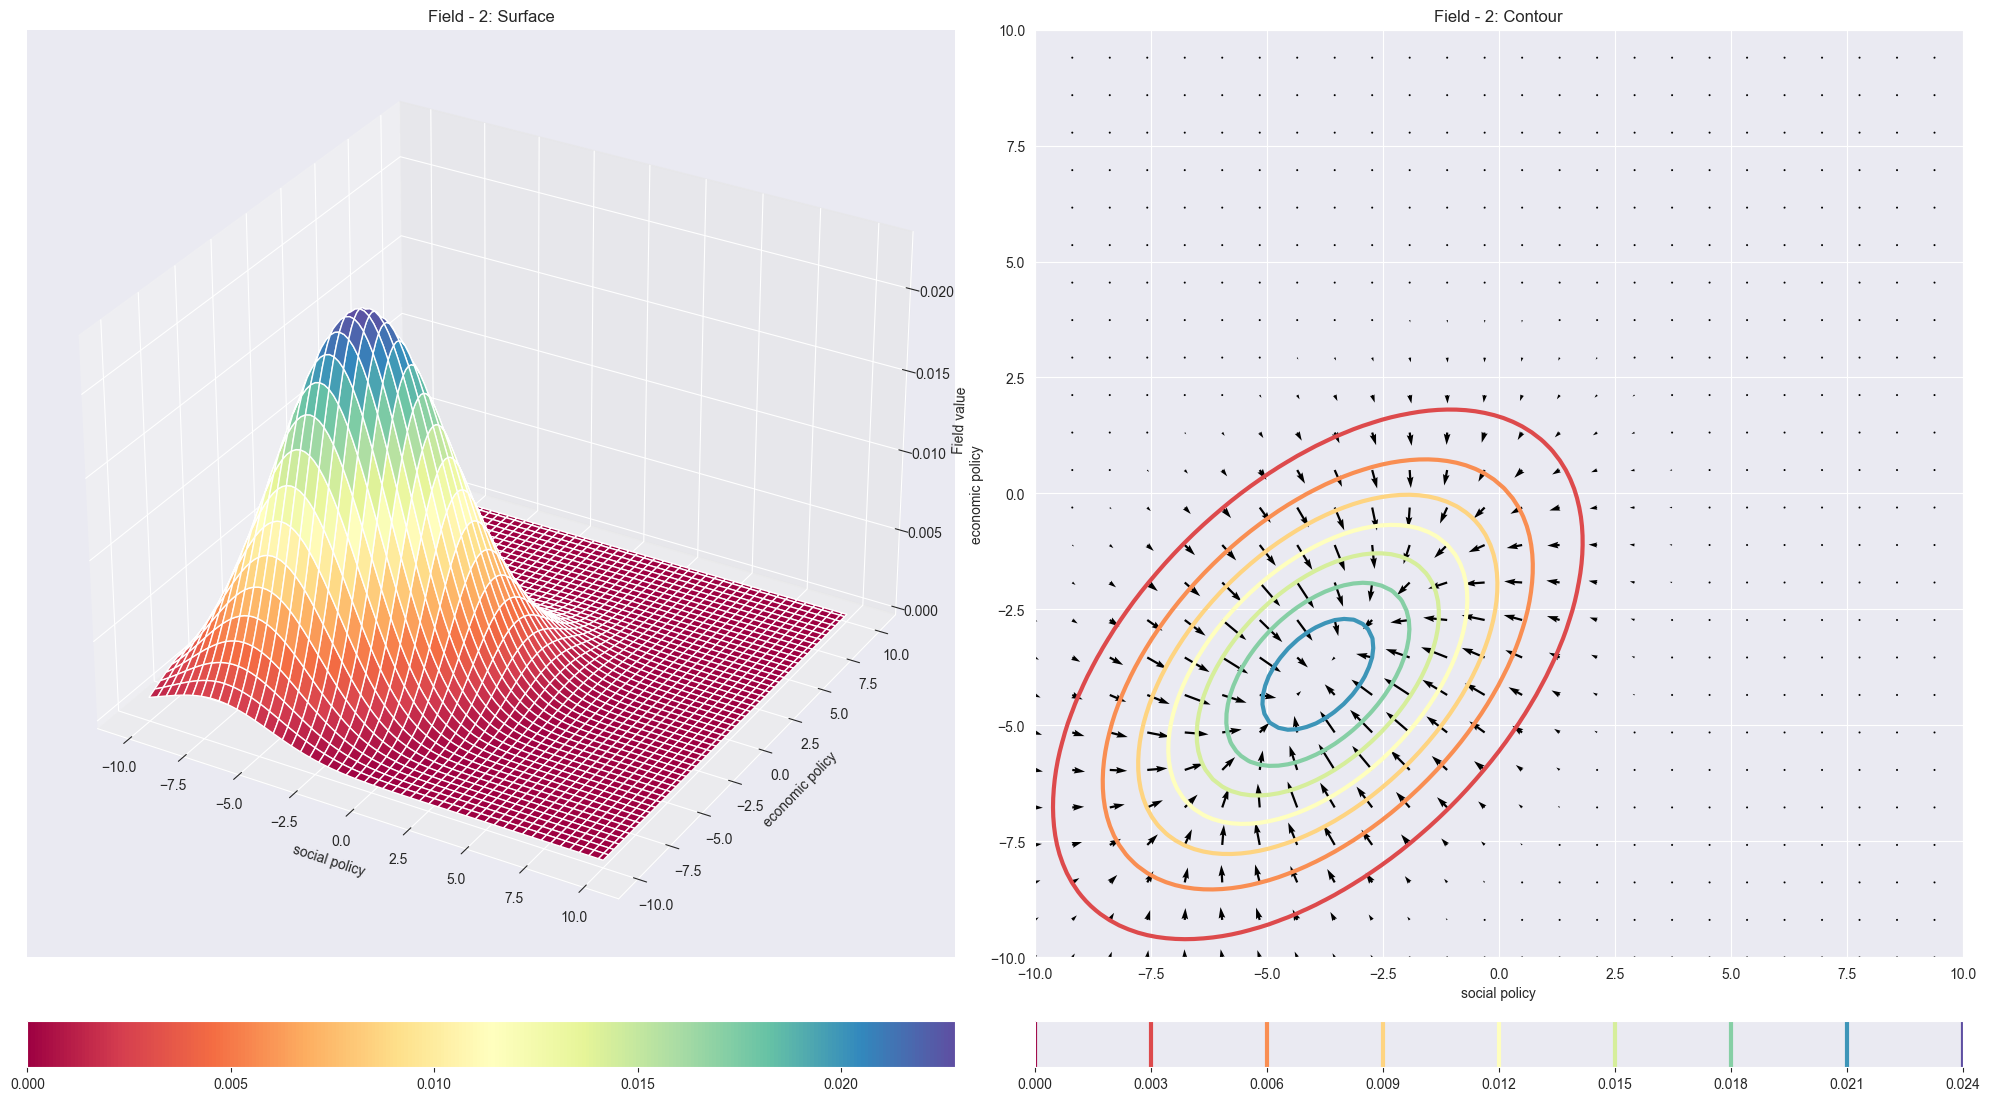

In [397]:
# Create grid and multivariate normal
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)

C = gradient_contour(X, Y, gaussian_field).reshape(2,100,100)

# Compute Gaussian distribution on grid
Z = gaussian_field(X, Y)

# Plotting
plot(X, Y, Z, C, 2, 0.2)

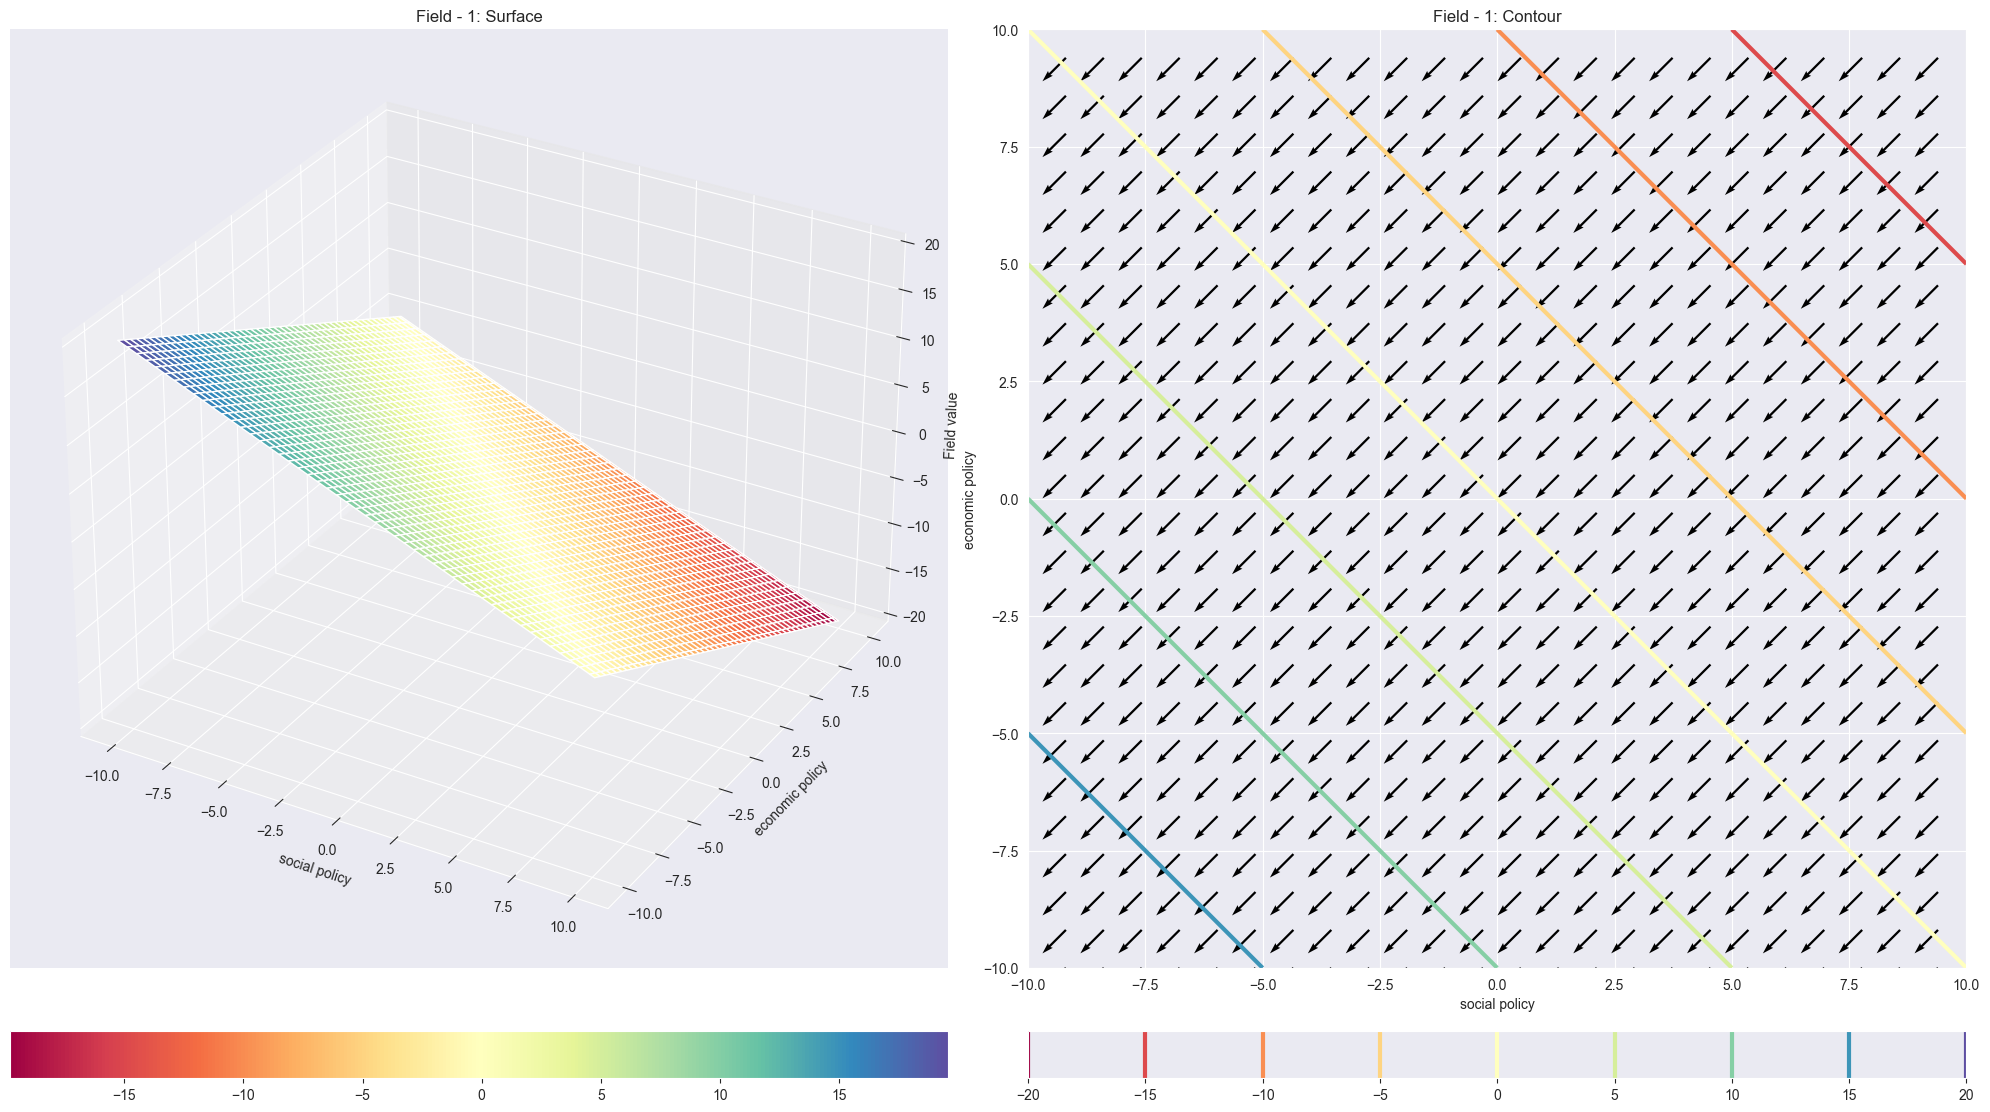

In [388]:
# Create grid and multivariate normal
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)

# Mean and covariance matrix
mean = np.array([-3.9, -3.9])
cov = np.array([[8.0, 4.0], [4.0, 8.0]])

C = gradient_contour(X, Y, linear_field).reshape(2,100,100)

# Compute Gaussian distribution on grid
Z = linear_field(X, Y)

# Plotting
plot(X, Y, Z, C, 1, scale=40)

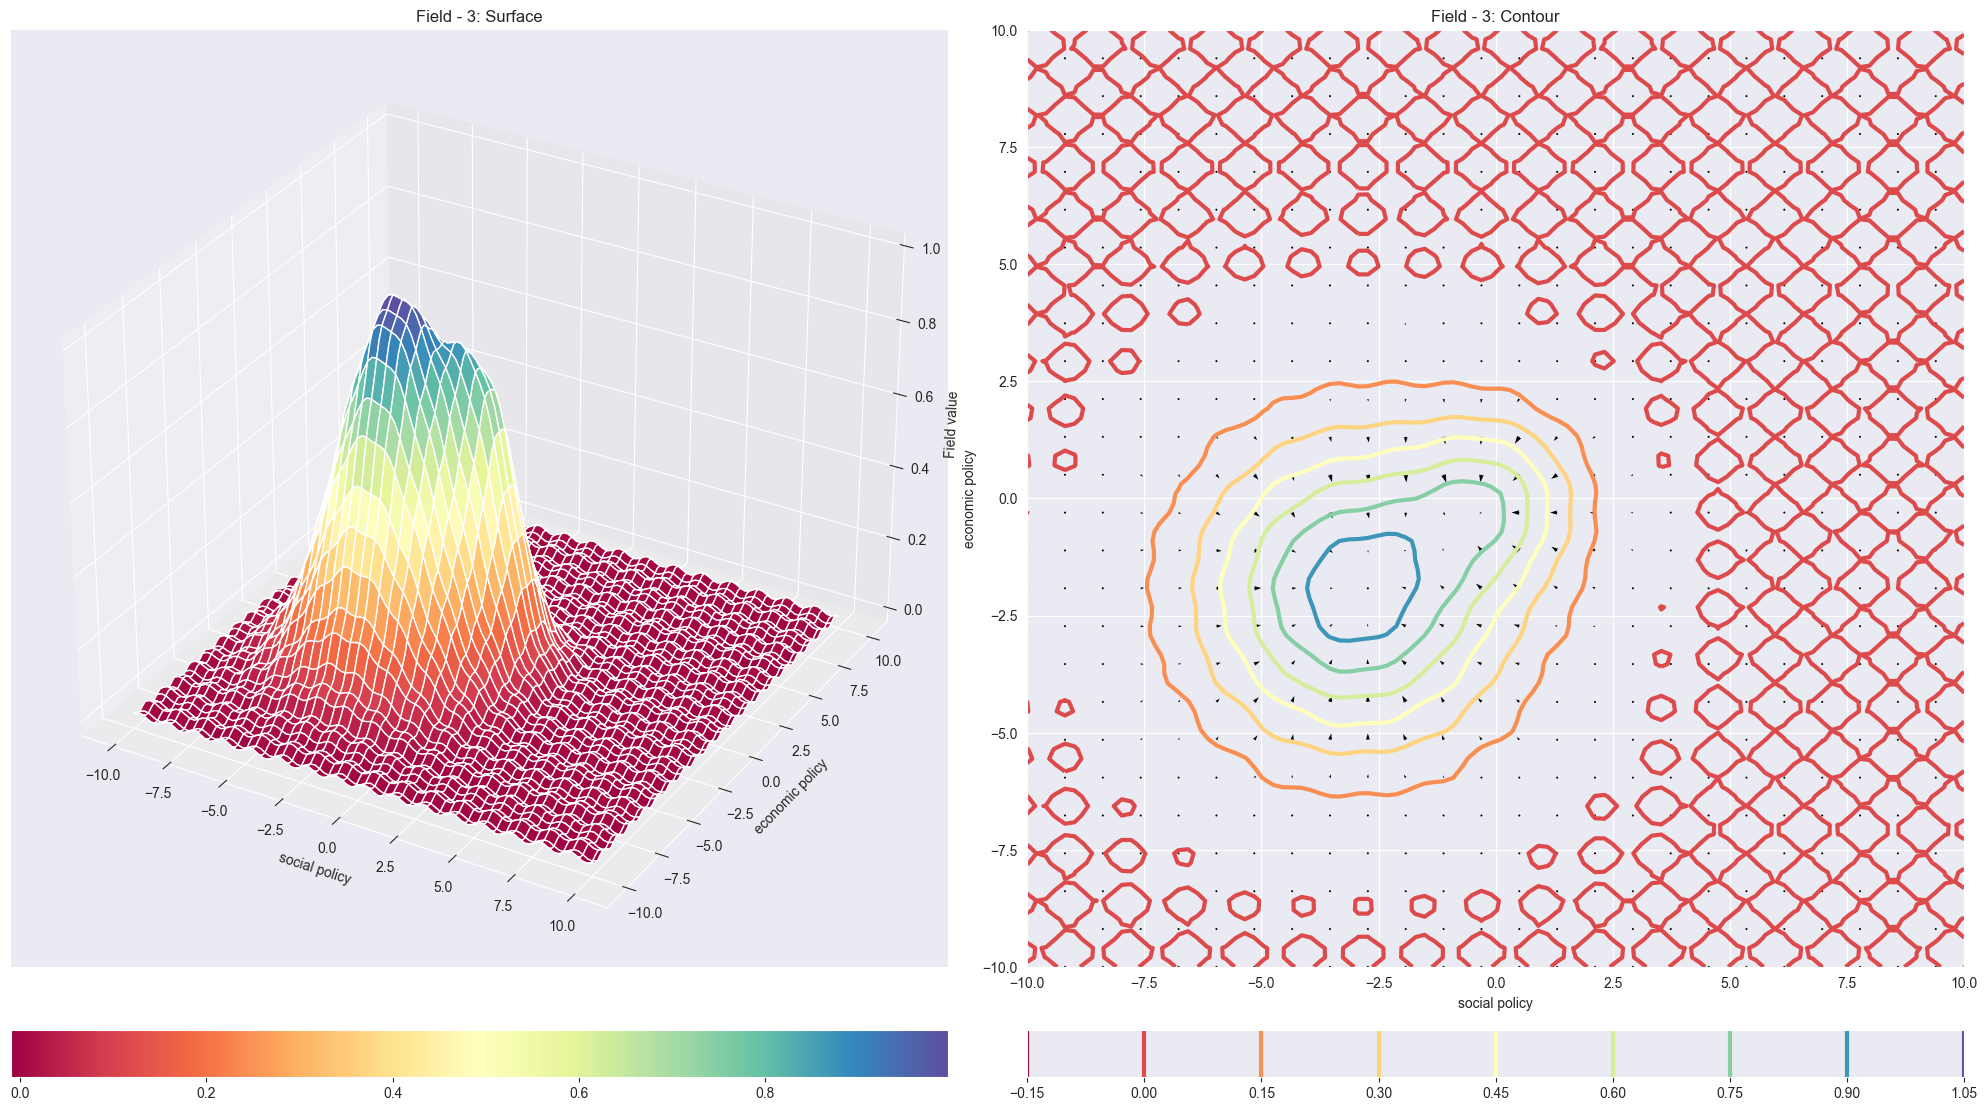

In [459]:
# Create grid and multivariate normal
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)

C = gradient_contour(X.flatten(), Y.flatten(), custom_field).reshape(2,100,100)

# Compute Gaussian distribution on grid
Z = custom_field(X, Y)
plot(X, Y, Z, C, 3, 40)

In [410]:
# Number of iterations
iterations = 12*4
magnitude = 0.1

def iterate(data_loc, iterations, magnitude, func):
    # Initialize points
    new_points = data_loc.values

    for _ in range(iterations):
        for i in range(new_points.shape[0]):
            grad = gradient_contour(new_points[i, 0], new_points[i, 1], func).squeeze()
            new_points[i] += magnitude * grad
    return new_points

<Figure size 700x700 with 0 Axes>

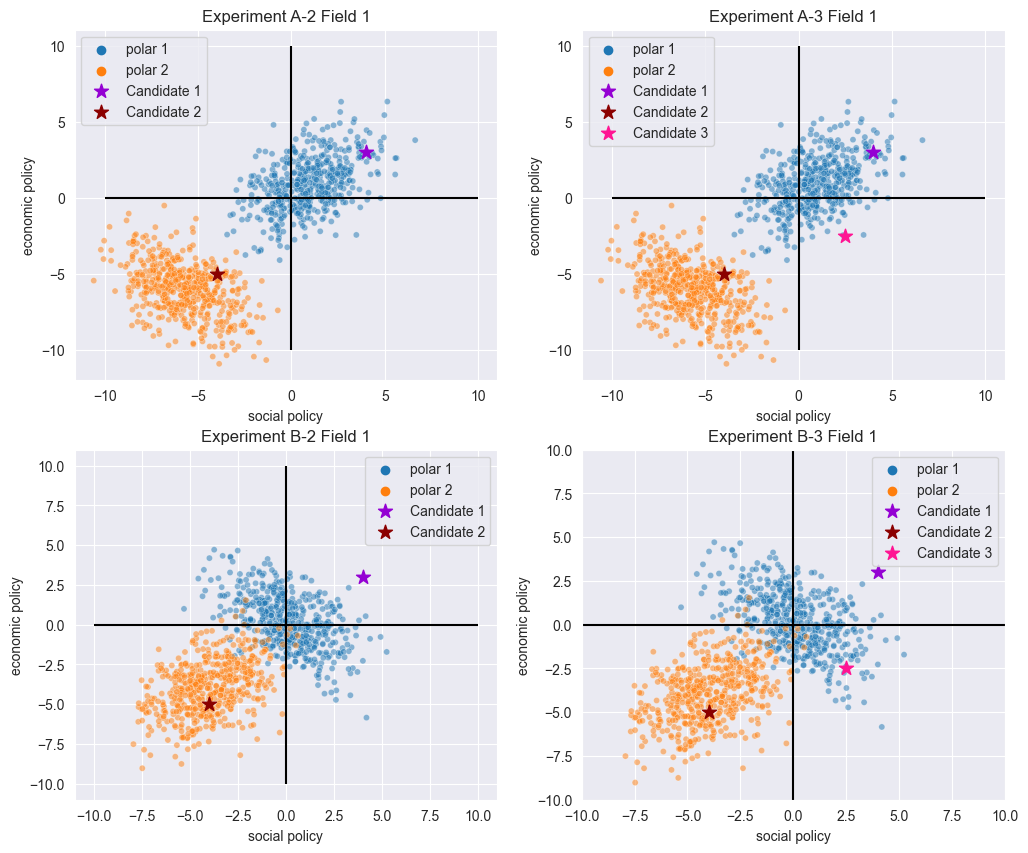

In [455]:
new_points = iterate(df_A[['x','y']], iterations, 0.05, linear_field)
df_A['x1'] = new_points[:,0]
df_A['y1'] = new_points[:,1]
new_points = iterate(df_B[['x','y']], iterations, 0.05, linear_field)
df_B['x1'] = new_points[:,0]
df_B['y1'] = new_points[:,1]
plot_data(df_A,df_B,'x1','y1','Field 1')

<Figure size 700x700 with 0 Axes>

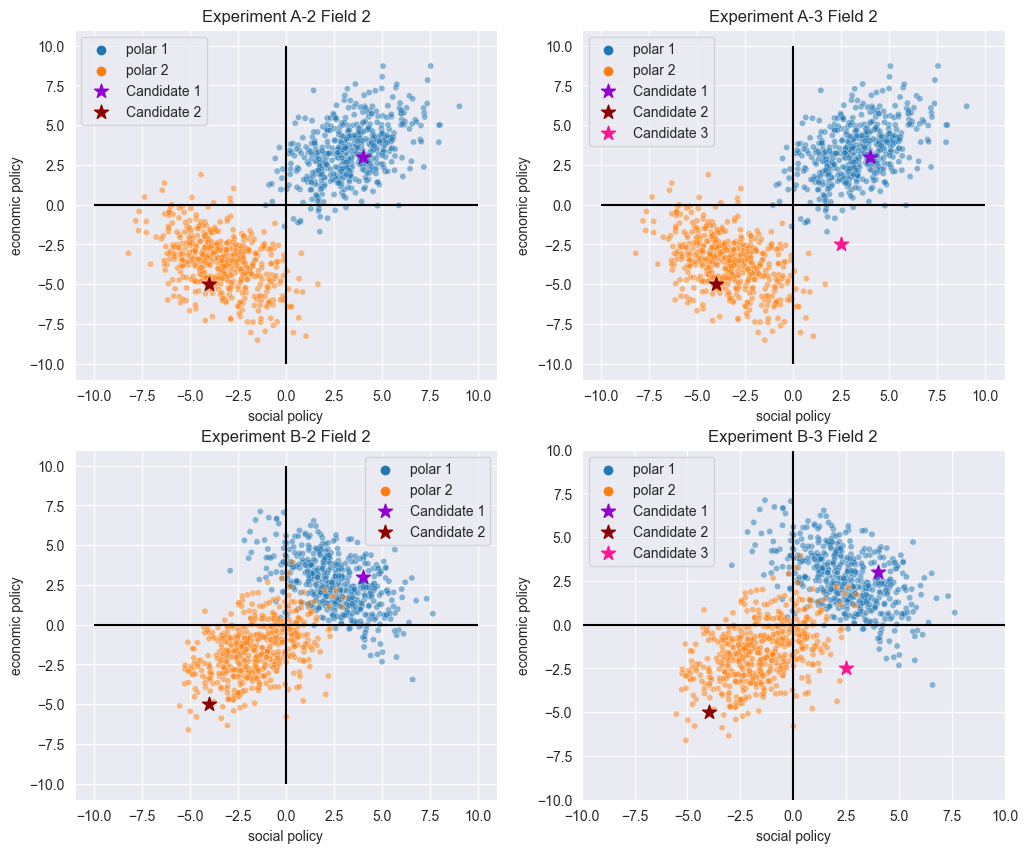

In [456]:
new_points = iterate(df_A[['x','y']], iterations, 0.05, gaussian_field)
df_A['x2'] = new_points[:,0]
df_A['y2'] = new_points[:,1]
new_points = iterate(df_B[['x','y']], iterations, 0.05, gaussian_field)
df_B['x2'] = new_points[:,0]
df_B['y2'] = new_points[:,1]
plot_data(df_A,df_B,'x2','y2','Field 2')

<Figure size 700x700 with 0 Axes>

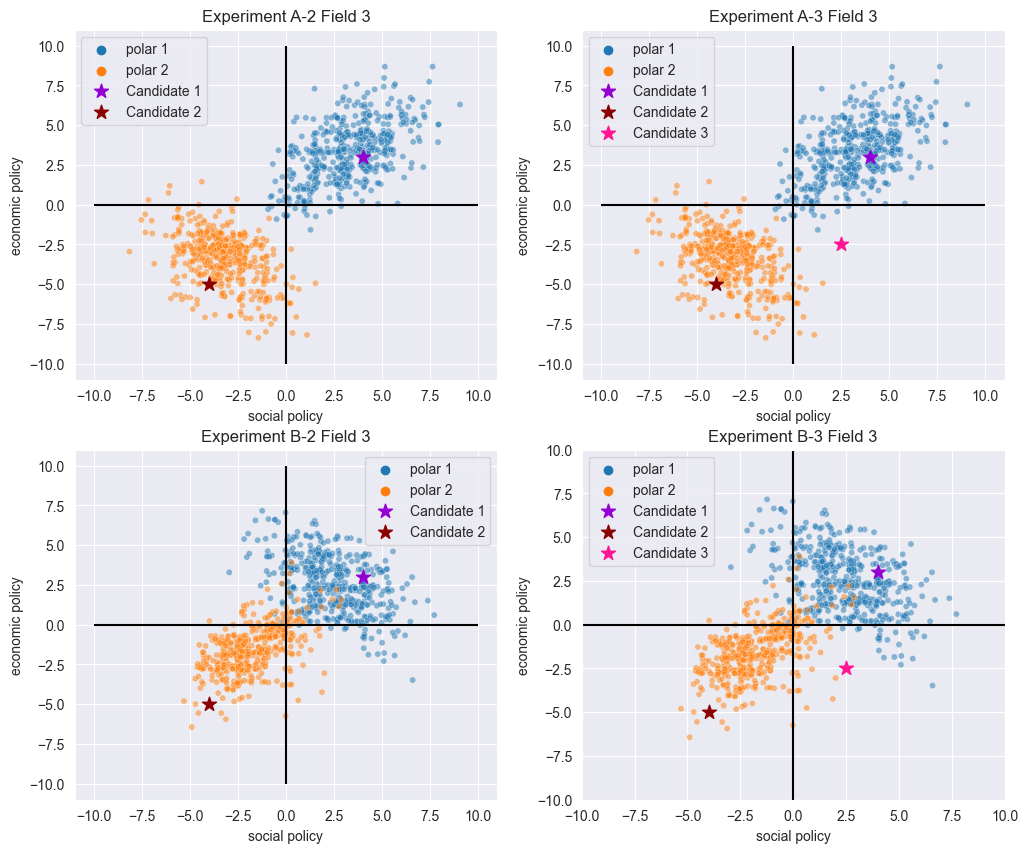

In [460]:
new_points = iterate(df_A[['x','y']], iterations, 0.05, custom_field)
df_A['x3'] = new_points[:,0]
df_A['y3'] = new_points[:,1]
new_points = iterate(df_B[['x','y']], iterations, 0.05, custom_field)
df_B['x3'] = new_points[:,0]
df_B['y3'] = new_points[:,1]
plot_data(df_A,df_B,'x3','y3','Field 3')

In [441]:
def get_vote_abstained(df,x,y,candidates, lambda_const=0.5, threshold = 10):
    scores = []
    for candidate in candidates:
        vec = df[[x,y]].values-candidate
        score = np.linalg.norm(vec,axis=1)
        mean = np.linalg.norm(vec,axis=1).mean()
        std  = np.linalg.norm(vec,axis=1).std()
        random_vec = np.random.normal(loc=mean, scale=std, size=len(vec))
        #score = step_function(score, mean+std)
        score = score + lambda_const*random_vec
        scores.append(score)
    votes = np.argmin(np.stack(scores,axis=1),axis=1)+1
    mask = np.min(np.stack(scores,axis=1),axis=1) > threshold
    votes[mask]= 5
    return votes.astype('str')

In [442]:
df_A['exp_A2_f1']= get_vote_abstained(df_A,'x1','y1',candidates[:-1])
df_A['exp_A3_f1']= get_vote_abstained(df_A,'x1','y1',candidates)
df_B['exp_B2_f1']= get_vote_abstained(df_B,'x1','y1',candidates[:-1])
df_B['exp_B3_f1']= get_vote_abstained(df_B,'x1','y1',candidates)

mapping = {'1': 'candidate 1 voter', '2': 'candidate 2 voter', '3': 'candidate 3 voter', '5': 'voter (abstained )'}
df_A['exp_A2_f1'] = df_A['exp_A2_f1'].map(mapping)
df_A['exp_A3_f1'] = df_A['exp_A3_f1'].map(mapping)
df_B['exp_B2_f1'] = df_B['exp_B2_f1'].map(mapping)
df_B['exp_B3_f1'] = df_B['exp_B3_f1'].map(mapping)

<Figure size 1400x1400 with 0 Axes>

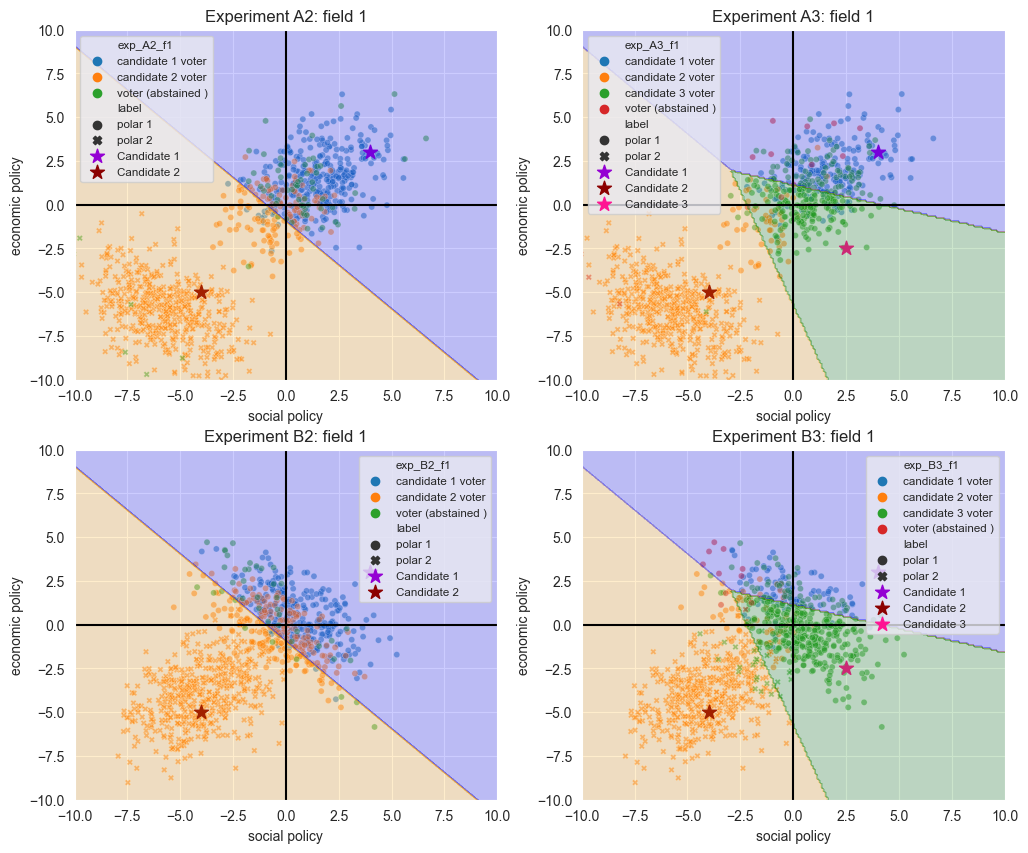

In [464]:
plt.figure(figsize=(14, 14))
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot the first result
axes[0,0].hlines(0,10,-10, colors='k')
axes[0, 0].vlines(0,10,-10, colors='k')
sns.scatterplot(df_A.sort_values(by='exp_A2_f1',ascending=True),x='x1',y='y1',hue='exp_A2_f1', alpha=0.5, s=20, style="label", ax = axes[0, 0])
axes[0, 0].scatter(4, 3, alpha=1, label='Candidate 1', s=110, color='darkviolet', marker='*')
axes[0, 0].scatter(-4, -5, alpha=1, label='Candidate 2', s=110, color='darkred', marker='*')
#plt.scatter(2.5, -2.5, alpha=1, label='Candidate 3', s=110, color='deeppink', marker='*')
axes[0, 0].contourf(df_boundary['x'].values.reshape(240,240), 
             df_boundary['y'].values.reshape(240,240), 
             df_boundary['exp_2'].values.reshape(240,240).astype('int'), 
             cmap = cmap2,
             alpha=0.2)
axes[0, 0].set_title('Experiment A2: field 1')
axes[0, 0].set_ylabel('economic policy')
axes[0, 0].set_xlabel('social policy')
axes[0, 0].legend(fontsize='small')
axes[0, 0].set_xlim(-10,10)
axes[0, 0].set_ylim(-10,10)

# Plot the second result
axes[0, 1].hlines(0,10,-10, colors='k')
axes[0, 1].vlines(0,10,-10, colors='k')
sns.scatterplot(df_A.sort_values(by='exp_A3_f1',ascending=True),x='x1',y='y1',hue='exp_A3_f1', alpha=0.5, s=20, style="label", ax= axes[0, 1])
axes[0, 1].scatter(4, 3, alpha=1, label='Candidate 1', s=110, color='darkviolet', marker='*')
axes[0, 1].scatter(-4, -5, alpha=1, label='Candidate 2', s=110, color='darkred', marker='*')
axes[0, 1].scatter(2.5, -2.5, alpha=1, label='Candidate 3', s=110, color='deeppink', marker='*')
axes[0, 1].contourf(df_boundary['x'].values.reshape(240,240), 
             df_boundary['y'].values.reshape(240,240), 
             df_boundary['exp_3'].values.reshape(240,240).astype('int'), 
             cmap = cmap3,
             alpha=0.2)
axes[0, 1].set_title('Experiment A3: field 1')
axes[0, 1].set_ylabel('economic policy')
axes[0, 1].set_xlabel('social policy')
axes[0, 1].legend(fontsize='small')
axes[0, 1].set_xlim(-10,10)
axes[0, 1].set_ylim(-10,10)

# Plot the third result
axes[1,0].hlines(0,10,-10, colors='k')
axes[1, 0].vlines(0,10,-10, colors='k')
sns.scatterplot(df_B.sort_values(by='exp_B2_f1',ascending=True),x='x1',y='y1',hue='exp_B2_f1', alpha=0.5, s=20, style="label", ax = axes[1, 0])
axes[1, 0].scatter(4, 3, alpha=1, label='Candidate 1', s=110, color='darkviolet', marker='*')
axes[1, 0].scatter(-4, -5, alpha=1, label='Candidate 2', s=110, color='darkred', marker='*')
#plt.scatter(2.5, -2.5, alpha=1, label='Candidate 3', s=110, color='deeppink', marker='*')
axes[1, 0].contourf(df_boundary['x'].values.reshape(240,240), 
             df_boundary['y'].values.reshape(240,240), 
             df_boundary['exp_2'].values.reshape(240,240).astype('int'), 
             cmap = cmap2,
             alpha=0.2)
axes[1, 0].set_title('Experiment B2: field 1')
axes[1, 0].set_ylabel('economic policy')
axes[1, 0].set_xlabel('social policy')
axes[1, 0].legend(fontsize='small')
axes[1, 0].set_xlim(-10,10)
axes[1, 0].set_ylim(-10,10)

# Plot the fourth result
axes[1, 1].hlines(0,10,-10, colors='k')
axes[1, 1].vlines(0,10,-10, colors='k')
sns.scatterplot(df_B.sort_values(by='exp_B3_f1',ascending=True),x='x1',y='y1',hue='exp_B3_f1', alpha=0.5, s=20, style="label", ax= axes[1, 1])
axes[1, 1].scatter(4, 3, alpha=1, label='Candidate 1', s=110, color='darkviolet', marker='*')
axes[1, 1].scatter(-4, -5, alpha=1, label='Candidate 2', s=110, color='darkred', marker='*')
axes[1, 1].scatter(2.5, -2.5, alpha=1, label='Candidate 3', s=110, color='deeppink', marker='*')
axes[1, 1].contourf(df_boundary['x'].values.reshape(240,240), 
             df_boundary['y'].values.reshape(240,240), 
             df_boundary['exp_3'].values.reshape(240,240).astype('int'), 
             cmap = cmap3,
             alpha=0.2)
axes[1, 1].set_title('Experiment B3: field 1')
axes[1, 1].set_ylabel('economic policy')
axes[1, 1].set_xlabel('social policy')
axes[1, 1].legend(fontsize='small')
axes[1, 1].set_xlim(-10,10)
axes[1, 1].set_ylim(-10,10)
plt.show()

In [465]:
df_A['exp_A2_f2']= get_vote_abstained(df_A,'x2','y2',candidates[:-1])
df_A['exp_A3_f2']= get_vote_abstained(df_A,'x2','y2',candidates)
df_B['exp_B2_f2']= get_vote_abstained(df_B,'x2','y2',candidates[:-1])
df_B['exp_B3_f2']= get_vote_abstained(df_B,'x2','y2',candidates)

mapping = {'1': 'candidate 1 voter', '2': 'candidate 2 voter', '3': 'candidate 3 voter', '5': 'voter (abstained )'}
df_A['exp_A2_f2'] = df_A['exp_A2_f2'].map(mapping)
df_A['exp_A3_f2'] = df_A['exp_A3_f2'].map(mapping)
df_B['exp_B2_f2'] = df_B['exp_B2_f2'].map(mapping)
df_B['exp_B3_f2'] = df_B['exp_B3_f2'].map(mapping)

<Figure size 1400x1400 with 0 Axes>

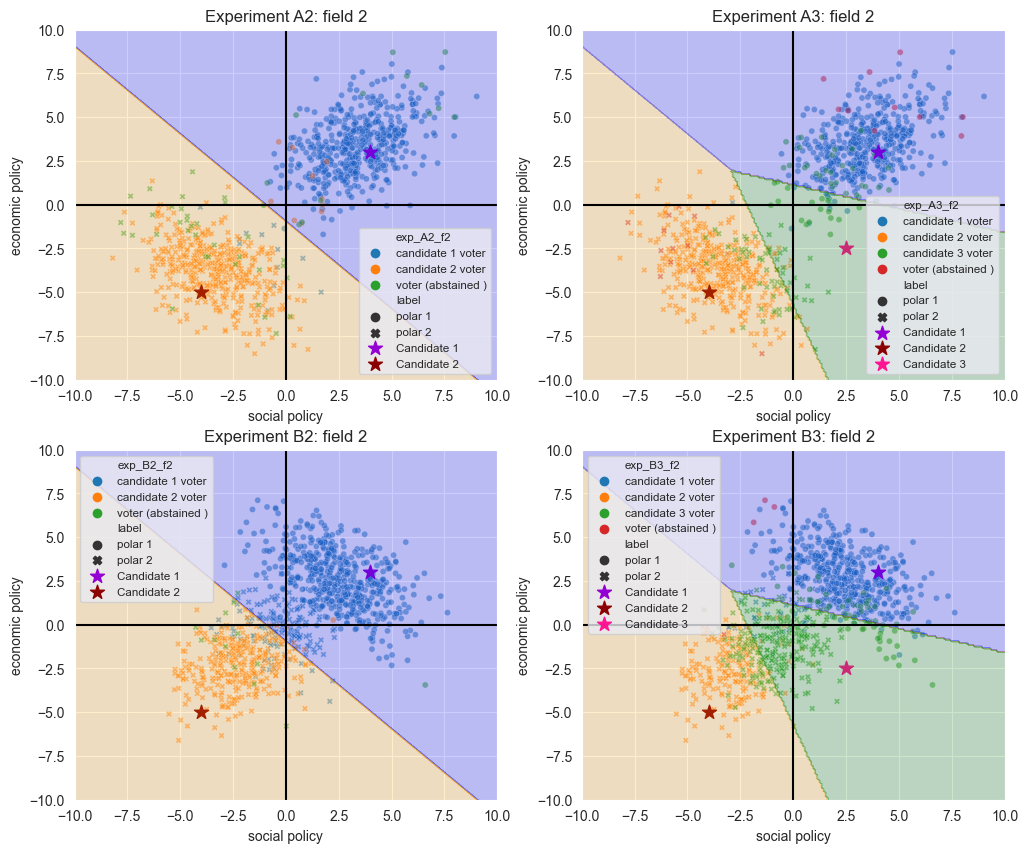

In [466]:
plt.figure(figsize=(14, 14))
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot the first result
axes[0,0].hlines(0,10,-10, colors='k')
axes[0, 0].vlines(0,10,-10, colors='k')
sns.scatterplot(df_A.sort_values(by='exp_A2_f2',ascending=True),x='x2',y='y2',hue='exp_A2_f2', alpha=0.5, s=20, style="label", ax = axes[0, 0])
axes[0, 0].scatter(4, 3, alpha=1, label='Candidate 1', s=110, color='darkviolet', marker='*')
axes[0, 0].scatter(-4, -5, alpha=1, label='Candidate 2', s=110, color='darkred', marker='*')
#plt.scatter(2.5, -2.5, alpha=1, label='Candidate 3', s=110, color='deeppink', marker='*')
axes[0, 0].contourf(df_boundary['x'].values.reshape(240,240), 
             df_boundary['y'].values.reshape(240,240), 
             df_boundary['exp_2'].values.reshape(240,240).astype('int'), 
             cmap = cmap2,
             alpha=0.2)
axes[0, 0].set_title('Experiment A2: field 2')
axes[0, 0].set_ylabel('economic policy')
axes[0, 0].set_xlabel('social policy')
axes[0, 0].legend(fontsize='small')
axes[0, 0].set_xlim(-10,10)
axes[0, 0].set_ylim(-10,10)

# Plot the second result
axes[0, 1].hlines(0,10,-10, colors='k')
axes[0, 1].vlines(0,10,-10, colors='k')
sns.scatterplot(df_A.sort_values(by='exp_A3_f2',ascending=True),x='x2',y='y2',hue='exp_A3_f2', alpha=0.5, s=20, style="label", ax= axes[0, 1])
axes[0, 1].scatter(4, 3, alpha=1, label='Candidate 1', s=110, color='darkviolet', marker='*')
axes[0, 1].scatter(-4, -5, alpha=1, label='Candidate 2', s=110, color='darkred', marker='*')
axes[0, 1].scatter(2.5, -2.5, alpha=1, label='Candidate 3', s=110, color='deeppink', marker='*')
axes[0, 1].contourf(df_boundary['x'].values.reshape(240,240), 
             df_boundary['y'].values.reshape(240,240), 
             df_boundary['exp_3'].values.reshape(240,240).astype('int'), 
             cmap = cmap3,
             alpha=0.2)
axes[0, 1].set_title('Experiment A3: field 2')
axes[0, 1].set_ylabel('economic policy')
axes[0, 1].set_xlabel('social policy')
axes[0, 1].legend(fontsize='small')
axes[0, 1].set_xlim(-10,10)
axes[0, 1].set_ylim(-10,10)

# Plot the third result
axes[1,0].hlines(0,10,-10, colors='k')
axes[1, 0].vlines(0,10,-10, colors='k')
sns.scatterplot(df_B.sort_values(by='exp_B2_f2',ascending=True),x='x2',y='y2',hue='exp_B2_f2', alpha=0.5, s=20, style="label", ax = axes[1, 0])
axes[1, 0].scatter(4, 3, alpha=1, label='Candidate 1', s=110, color='darkviolet', marker='*')
axes[1, 0].scatter(-4, -5, alpha=1, label='Candidate 2', s=110, color='darkred', marker='*')
#plt.scatter(2.5, -2.5, alpha=1, label='Candidate 3', s=110, color='deeppink', marker='*')
axes[1, 0].contourf(df_boundary['x'].values.reshape(240,240), 
             df_boundary['y'].values.reshape(240,240), 
             df_boundary['exp_2'].values.reshape(240,240).astype('int'), 
             cmap = cmap2,
             alpha=0.2)
axes[1, 0].set_title('Experiment B2: field 2')
axes[1, 0].set_ylabel('economic policy')
axes[1, 0].set_xlabel('social policy')
axes[1, 0].legend(fontsize='small')
axes[1, 0].set_xlim(-10,10)
axes[1, 0].set_ylim(-10,10)

# Plot the fourth result
axes[1, 1].hlines(0,10,-10, colors='k')
axes[1, 1].vlines(0,10,-10, colors='k')
sns.scatterplot(df_B.sort_values(by='exp_B3_f2',ascending=True),x='x2',y='y2',hue='exp_B3_f2', alpha=0.5, s=20, style="label", ax= axes[1, 1])
axes[1, 1].scatter(4, 3, alpha=1, label='Candidate 1', s=110, color='darkviolet', marker='*')
axes[1, 1].scatter(-4, -5, alpha=1, label='Candidate 2', s=110, color='darkred', marker='*')
axes[1, 1].scatter(2.5, -2.5, alpha=1, label='Candidate 3', s=110, color='deeppink', marker='*')
axes[1, 1].contourf(df_boundary['x'].values.reshape(240,240), 
             df_boundary['y'].values.reshape(240,240), 
             df_boundary['exp_3'].values.reshape(240,240).astype('int'), 
             cmap = cmap3,
             alpha=0.2)
axes[1, 1].set_title('Experiment B3: field 2')
axes[1, 1].set_ylabel('economic policy')
axes[1, 1].set_xlabel('social policy')
axes[1, 1].legend(fontsize='small')
axes[1, 1].set_xlim(-10,10)
axes[1, 1].set_ylim(-10,10)
plt.show()

In [467]:
df_A['exp_A2_f3']= get_vote_abstained(df_A,'x3','y3',candidates[:-1])
df_A['exp_A3_f3']= get_vote_abstained(df_A,'x3','y3',candidates)
df_B['exp_B2_f3']= get_vote_abstained(df_B,'x3','y3',candidates[:-1])
df_B['exp_B3_f3']= get_vote_abstained(df_B,'x3','y3',candidates)

mapping = {'1': 'candidate 1 voter', '2': 'candidate 2 voter', '3': 'candidate 3 voter', '5': 'voter (abstained )'}
df_A['exp_A2_f3'] = df_A['exp_A2_f3'].map(mapping)
df_A['exp_A3_f3'] = df_A['exp_A3_f3'].map(mapping)
df_B['exp_B2_f3'] = df_B['exp_B2_f3'].map(mapping)
df_B['exp_B3_f3'] = df_B['exp_B3_f3'].map(mapping)

<Figure size 1400x1400 with 0 Axes>

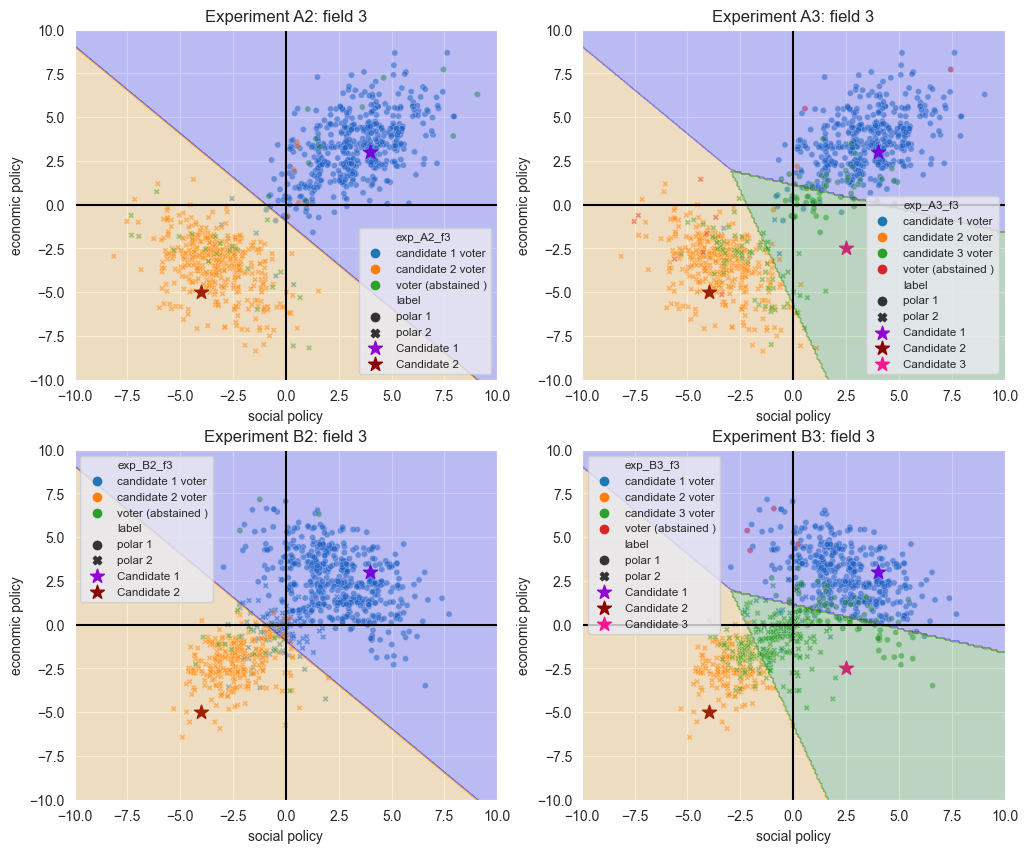

In [468]:
plt.figure(figsize=(14, 14))
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot the first result
axes[0,0].hlines(0,10,-10, colors='k')
axes[0, 0].vlines(0,10,-10, colors='k')
sns.scatterplot(df_A.sort_values(by='exp_A2_f3',ascending=True),x='x3',y='y3',hue='exp_A2_f3', alpha=0.5, s=20, style="label", ax = axes[0, 0])
axes[0, 0].scatter(4, 3, alpha=1, label='Candidate 1', s=110, color='darkviolet', marker='*')
axes[0, 0].scatter(-4, -5, alpha=1, label='Candidate 2', s=110, color='darkred', marker='*')
#plt.scatter(2.5, -2.5, alpha=1, label='Candidate 3', s=110, color='deeppink', marker='*')
axes[0, 0].contourf(df_boundary['x'].values.reshape(240,240), 
             df_boundary['y'].values.reshape(240,240), 
             df_boundary['exp_2'].values.reshape(240,240).astype('int'), 
             cmap = cmap2,
             alpha=0.2)
axes[0, 0].set_title('Experiment A2: field 3')
axes[0, 0].set_ylabel('economic policy')
axes[0, 0].set_xlabel('social policy')
axes[0, 0].legend(fontsize='small')
axes[0, 0].set_xlim(-10,10)
axes[0, 0].set_ylim(-10,10)

# Plot the second result
axes[0, 1].hlines(0,10,-10, colors='k')
axes[0, 1].vlines(0,10,-10, colors='k')
sns.scatterplot(df_A.sort_values(by='exp_A3_f3',ascending=True),x='x3',y='y3',hue='exp_A3_f3', alpha=0.5, s=20, style="label", ax= axes[0, 1])
axes[0, 1].scatter(4, 3, alpha=1, label='Candidate 1', s=110, color='darkviolet', marker='*')
axes[0, 1].scatter(-4, -5, alpha=1, label='Candidate 2', s=110, color='darkred', marker='*')
axes[0, 1].scatter(2.5, -2.5, alpha=1, label='Candidate 3', s=110, color='deeppink', marker='*')
axes[0, 1].contourf(df_boundary['x'].values.reshape(240,240), 
             df_boundary['y'].values.reshape(240,240), 
             df_boundary['exp_3'].values.reshape(240,240).astype('int'), 
             cmap = cmap3,
             alpha=0.2)
axes[0, 1].set_title('Experiment A3: field 3')
axes[0, 1].set_ylabel('economic policy')
axes[0, 1].set_xlabel('social policy')
axes[0, 1].legend(fontsize='small')
axes[0, 1].set_xlim(-10,10)
axes[0, 1].set_ylim(-10,10)

# Plot the third result
axes[1,0].hlines(0,10,-10, colors='k')
axes[1, 0].vlines(0,10,-10, colors='k')
sns.scatterplot(df_B.sort_values(by='exp_B2_f3',ascending=True),x='x3',y='y3',hue='exp_B2_f3', alpha=0.5, s=20, style="label", ax = axes[1, 0])
axes[1, 0].scatter(4, 3, alpha=1, label='Candidate 1', s=110, color='darkviolet', marker='*')
axes[1, 0].scatter(-4, -5, alpha=1, label='Candidate 2', s=110, color='darkred', marker='*')
#plt.scatter(2.5, -2.5, alpha=1, label='Candidate 3', s=110, color='deeppink', marker='*')
axes[1, 0].contourf(df_boundary['x'].values.reshape(240,240), 
             df_boundary['y'].values.reshape(240,240), 
             df_boundary['exp_2'].values.reshape(240,240).astype('int'), 
             cmap = cmap2,
             alpha=0.2)
axes[1, 0].set_title('Experiment B2: field 3')
axes[1, 0].set_ylabel('economic policy')
axes[1, 0].set_xlabel('social policy')
axes[1, 0].legend(fontsize='small')
axes[1, 0].set_xlim(-10,10)
axes[1, 0].set_ylim(-10,10)

# Plot the fourth result
axes[1, 1].hlines(0,10,-10, colors='k')
axes[1, 1].vlines(0,10,-10, colors='k')
sns.scatterplot(df_B.sort_values(by='exp_B3_f3',ascending=True),x='x3',y='y3',hue='exp_B3_f3', alpha=0.5, s=20, style="label", ax= axes[1, 1])
axes[1, 1].scatter(4, 3, alpha=1, label='Candidate 1', s=110, color='darkviolet', marker='*')
axes[1, 1].scatter(-4, -5, alpha=1, label='Candidate 2', s=110, color='darkred', marker='*')
axes[1, 1].scatter(2.5, -2.5, alpha=1, label='Candidate 3', s=110, color='deeppink', marker='*')
axes[1, 1].contourf(df_boundary['x'].values.reshape(240,240), 
             df_boundary['y'].values.reshape(240,240), 
             df_boundary['exp_3'].values.reshape(240,240).astype('int'), 
             cmap = cmap3,
             alpha=0.2)
axes[1, 1].set_title('Experiment B3: field 3')
axes[1, 1].set_ylabel('economic policy')
axes[1, 1].set_xlabel('social policy')
axes[1, 1].legend(fontsize='small')
axes[1, 1].set_xlim(-10,10)
axes[1, 1].set_ylim(-10,10)
plt.show()

In [471]:
def plot_heat_map(df_A,df_B,exp_A2,exp_A3,exp_B2,exp_B3):
    # Define a color map and normalization for a consistent color scale
    cmap = 'Spectral'

    plt.figure(figsize=(18,18))

    # Create a 2x2 subplot grid
    fig, axs = plt.subplots(2, 2, figsize=(10, 8))

    norm = mcolors.Normalize(vmin=1, vmax=500)

    # Plot heatmaps on each subplot
    sns.heatmap(df_A.pivot_table(values='count',index=exp_A2,columns='label',aggfunc='sum'), cmap=cmap, norm=norm, ax=axs[0, 0], cbar=False, annot=True, fmt='.2f')
    axs[0, 0].set_title('exp A2: Mixed Preferences (lambda = 0.5)')

    sns.heatmap(df_A.pivot_table(values='count',index=exp_A3,columns='label',aggfunc='sum'), cmap=cmap, norm=norm, ax=axs[0, 1], cbar=False, annot=True, fmt='.2f')
    axs[0, 1].set_title('exp A3: Abstained (lambda = 0.5)')

    sns.heatmap(df_B.pivot_table(values='count',index=exp_B2,columns='label',aggfunc='sum'), cmap=cmap, norm=norm, ax=axs[1, 0], cbar=False, annot=True, fmt='.2f')
    axs[1, 0].set_title('exp B2: Abstained (lambda = 0.5)')

    sns.heatmap(df_B.pivot_table(values='count',index=exp_B3,columns='label',aggfunc='sum'), cmap=cmap, norm=norm, ax=axs[1, 1], cbar=False, annot=True, fmt='.2f')
    axs[1, 1].set_title('exp B3: Abstained (lambda = 0.5)')

    # Create a single shared colorbar
    # Add an empty subplot to act as a colorbar axis
    scalar_mappable = plt.cm.ScalarMappable(norm=norm, cmap=cmap)

    # Add the unrelated colorbar
    cbar_ax = fig.add_axes([0.055, 0.01, 0.8, 0.03])
    plt.colorbar(scalar_mappable, ax=plt.gca(), label='number of voters', cax=cbar_ax, orientation='horizontal')

    # Adjust layout
    plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust layout to make room for the colorbar

    # Show the plot
    plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_11328\1466677259.py:34: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust layout to make room for the colorbar


<Figure size 1800x1800 with 0 Axes>

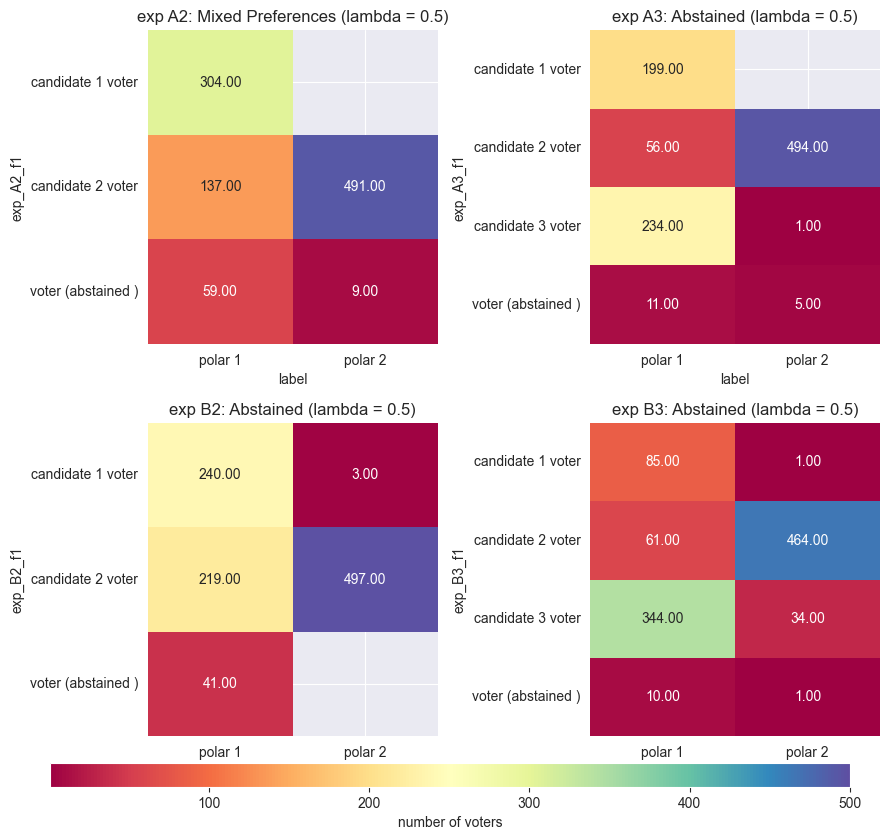

In [472]:
plot_heat_map(df_A,df_B,'exp_A2_f1','exp_A3_f1','exp_B2_f1','exp_B3_f1')

C:\Users\User\AppData\Local\Temp\ipykernel_11328\1466677259.py:34: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust layout to make room for the colorbar


<Figure size 1800x1800 with 0 Axes>

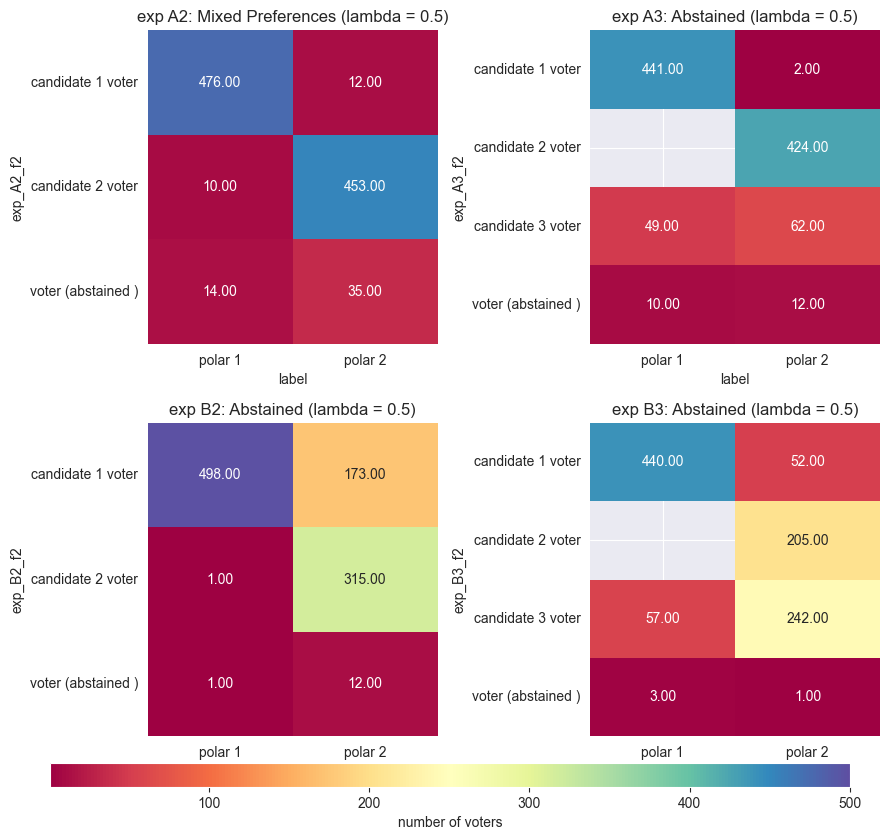

In [473]:

plot_heat_map(df_A,df_B,'exp_A2_f2','exp_A3_f2','exp_B2_f2','exp_B3_f2')

C:\Users\User\AppData\Local\Temp\ipykernel_11328\1466677259.py:34: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust layout to make room for the colorbar


<Figure size 1800x1800 with 0 Axes>

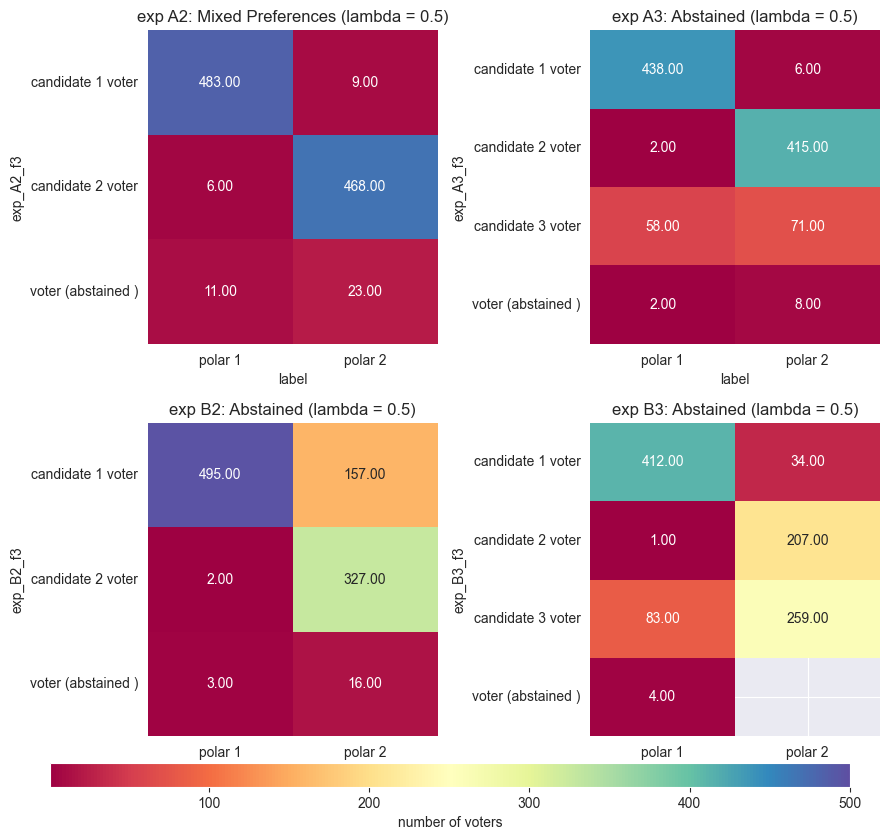

In [474]:

plot_heat_map(df_A,df_B,'exp_A2_f3','exp_A3_f3','exp_B2_f3','exp_B3_f3')

In [714]:
def get_vote_new(df,x,y,candidates, lambda_const=0.5, threshold = 10):
    scores = []
    for candidate in candidates:
        vec = df[[x,y]].values-candidate
        score = np.linalg.norm(vec,axis=1)
        mean = np.linalg.norm(vec,axis=1).mean()
        std  = np.linalg.norm(vec,axis=1).std()
        random_vec = np.random.normal(loc=mean, scale=std, size=len(vec))
        #score = step_function(score, mean+std)
        score = score + lambda_const*random_vec
        scores.append(score)
    votes = np.argsort(np.stack(scores,axis=1),axis=1)[:, ::-1]+1
    mask = np.min(np.stack(scores,axis=1),axis=1) > threshold
    votes[mask]= 5
    return votes.astype('str')

In [762]:
from collections import Counter
from functools import reduce

def count_votes(result,choices = 3):
    df_count = []
    for i in range(choices):
        df = pd.DataFrame.from_dict(Counter(result[:,i]), orient='index').reset_index()
        df.columns = ['Candidate No.', f'Worst Rank{i+1}']
        df_count.append(df)
    df_count = reduce(lambda left, right: pd.merge(left, right, on='Candidate No.', how='outer'), df_count).sort_values('Candidate No.')
    return df_count

In [763]:
resultA3 = get_vote_new(df_A,'x','y',candidates[:])
resultA2 = get_vote_new(df_A,'x','y',candidates[:-1])
resultB3 = get_vote_new(df_B,'x','y',candidates[:])
resultB2 = get_vote_new(df_B,'x','y',candidates[:-1])

In [764]:
df_countA3 = count_votes(resultA3,choices = 3)
df_countA2 = count_votes(resultA2,choices = 2)
df_countB3 = count_votes(resultB3,choices = 3)
df_countB2 = count_votes(resultB2,choices = 2)
df_countA3 = df_countA3.set_index('Candidate No.')
df_countA2 = df_countA2.set_index('Candidate No.')
df_countB2 = df_countB2.set_index('Candidate No.')
df_countB3 = df_countB3.set_index('Candidate No.')

<Figure size 1800x2200 with 0 Axes>

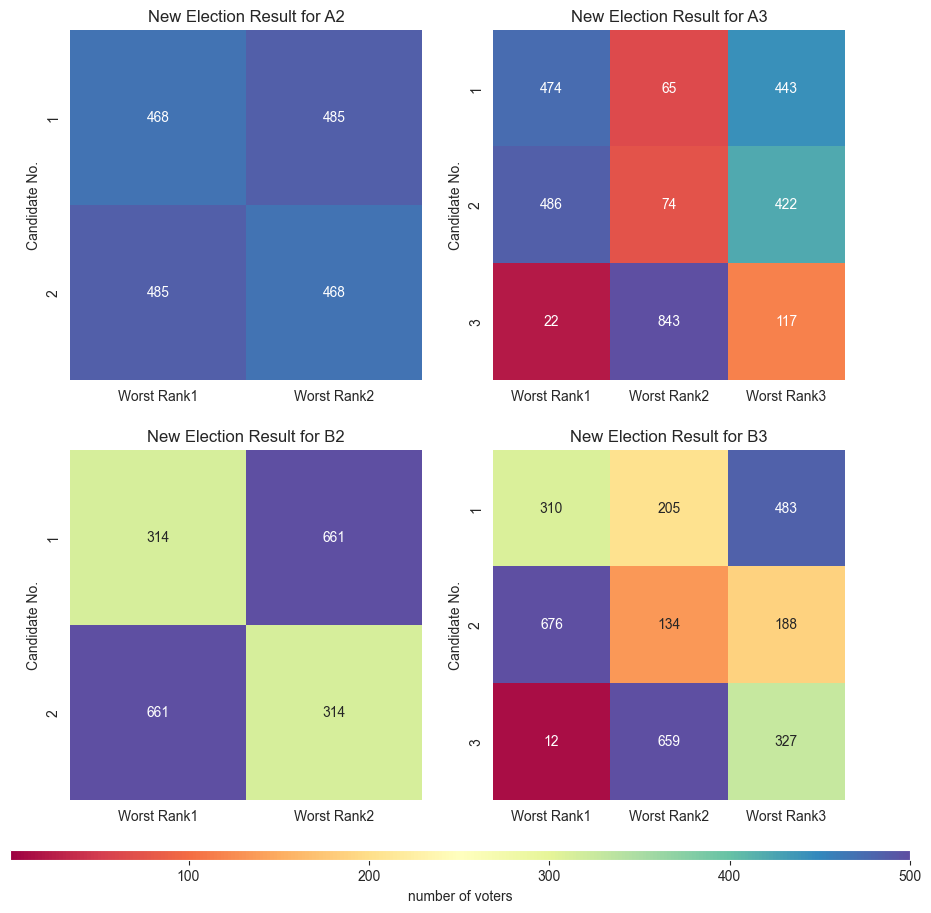

In [785]:
# Define a color map and normalization for a consistent color scale
cmap = 'Spectral'

plt.figure(figsize=(18,22))

# Create a 2x2 subplot grid
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

norm = mcolors.Normalize(vmin=1, vmax=500)

# Plot heatmaps on each subplot
sns.heatmap(df_countA2[df_countA2.columns[-2:]].iloc[:2], annot=True,fmt='g' , cmap=cmap, norm=norm, ax=axs[0, 0], cbar=False)
axs[0, 0].set_title('New Election Result for A2')

sns.heatmap(df_countA3[df_countA3.columns[-3:]].iloc[:3], annot=True,fmt='g' , cmap=cmap, norm=norm, ax=axs[0, 1], cbar=False)
axs[0, 1].set_title('New Election Result for A3')

sns.heatmap(df_countB2[df_countB2.columns[-2:]].iloc[:2], annot=True,fmt='g' , cmap=cmap, norm=norm, ax=axs[1, 0], cbar=False)
axs[1, 0].set_title('New Election Result for B2')

sns.heatmap(df_countB3[df_countB3.columns[-3:]].iloc[:3], annot=True,fmt='g' , cmap=cmap, norm=norm, ax=axs[1, 1], cbar=False)
axs[1, 1].set_title('New Election Result for B3')

# Create a single shared colorbar
# Add an empty subplot to act as a colorbar axis
scalar_mappable = plt.cm.ScalarMappable(norm=norm, cmap=cmap)

# Add the unrelated colorbar
cbar_ax = fig.add_axes([0.065, 0.05, 0.9, 0.01])
plt.colorbar(scalar_mappable, ax=plt.gca(), label='number of voters', cax=cbar_ax, orientation='horizontal', pad=1)

# Adjust layout
#plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust layout to make room for the colorbar

# Show the plot
plt.show()

In [ ]:
sns.heatmap(df_count[df_count.columns[-3:]].iloc[:3], annot=True,fmt='g')

In [792]:
df_countA3[df_countA3.columns[-3:]].iloc[:3].values@np.array([0.6,0.3,0.1]).T
#Counter(resultA2[:,1])

array([348.2, 356. , 277.8])

In [811]:
print(f'Winner for candidate A2: candidate {np.argmin(df_countA2[df_countA2.columns[-2:]].iloc[:2].values@np.array([0.9,0.1]).T)+1}')
print(f'Winner for candidate B2: candidate {np.argmin(df_countB2[df_countB2.columns[-2:]].iloc[:2].values@np.array([0.9,0.1]).T)+1}')
print(f'Winner for candidate A3: candidate {np.argmin(df_countA3[df_countA3.columns[-3:]].iloc[:3].values@np.array([0.6,0.3,0.1]).T)+1}')
print(f'Winner for candidate B3: candidate {np.argmin(df_countB3[df_countB3.columns[-3:]].iloc[:3].values@np.array([0.6,0.3,0.1]).T)+1}')

Winner for candidate A2: candidate 1
Winner for candidate B2: candidate 1
Winner for candidate A3: candidate 3
Winner for candidate B3: candidate 3
